In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
properties = pd.read_csv('/Users/socrteas/Documents/Kaggle/zillow/data/properties_2016.csv')

/anaconda/envs/zillow/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train = pd.read_csv('/Users/socrteas/Documents/Kaggle/zillow/data/train_2016_v2.csv', parse_dates = ["transactiondate"])

In [4]:
properties.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [5]:
properties.assessmentyear.value_counts(dropna=False).sort_index()

 2000.0          1
 2001.0          3
 2002.0          1
 2003.0          3
 2004.0          6
 2005.0          2
 2009.0          2
 2010.0          2
 2011.0          1
 2012.0         26
 2013.0          4
 2014.0       1306
 2015.0    2972420
 2016.0          1
NaN          11439
Name: assessmentyear, dtype: int64

In [7]:
merged = pd.merge(train,properties,how='left',on='parcelid')
merged['transaction_month'] = merged['transactiondate'].dt.month

In [8]:
print(merged.shape)
print(merged.assessmentyear.count())

(90275, 61)
90275


In [9]:
merged.assessmentyear.agg(np.mean)

2015.0

In [10]:
merged[merged.assessmentyear.isnull()].logerror.agg(np.mean)

nan

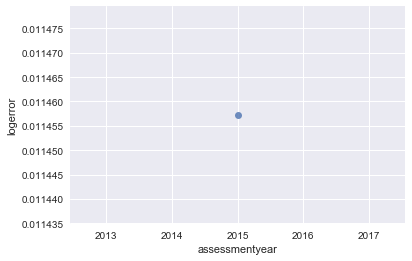

In [11]:
means = merged[['assessmentyear', 'logerror']].groupby('assessmentyear').agg(np.mean)
means.reset_index(inplace=True)
sns.regplot(x='assessmentyear', y='logerror', data=means, fit_reg=False)